In [ ]:
#######################################################################################
# Project "Developing predictive models for COVID-19 diagnosis in paediatric patients: 
#          A case study about the potentials of Machine Learning in Public Health"
#          By Anna Mas-Casadesús (https://github.com/amascasadesus)
#          July 2020
#
#          Notebook 2/6
#######################################################################################

### Import basic modules & dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import grid
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.graph_objs as go 
import plotly.offline as py
import plotly.tools as tls
import warnings
from warnings import simplefilter
warnings.filterwarnings('ignore')
simplefilter(action='ignore', category=FutureWarning)

In [2]:
symp = pd.read_csv('symptoms_paediatric_pp1.csv')
symp_copy = symp.copy() # create checkpoint

In [3]:
symp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           86 non-null     int64  
 1   age                          86 non-null     float64
 2   gender                       86 non-null     int64  
 3   diagnosis_covid              86 non-null     int64  
 4   diagnosis_summary_labels     86 non-null     object 
 5   causal_agent_summary_labels  33 non-null     object 
 6   underlying_conditions        86 non-null     int64  
 7   immunosupressed              86 non-null     int64  
 8   pid_sid                      86 non-null     int64  
 9   admission                    86 non-null     int64  
 10  admmission_by_covid          86 non-null     int64  
 11  admission_by_other           86 non-null     int64  
 12  admission_picu               86 non-null     int64  
 13  respiratory           

### Feature selection I

Given the high amount of features or variables that our dataset has, applying some variable selection or dimensionality reduction might help to improve our models. We will use specific algorithms (i.e. Principal Component Analysis or PCA) later on, but, as a first approach, we will remove a series of features following different criteria. 

#### Selected subset

We remove:
 - `id` uninformative
 - `age_group1` and `age_group2`duplicated info in `age`
 - all the 'labels' variables (i.e. strings; info duplicated in corresponding coded variables)
 - `diagnosis_summary`,`causal_agent_summary`, `admission_by_covid`, `admission_by_other` they are in conflict our target, `diagnosis_covid` (i.e. they inherently contain info about the covid diagnosis)
 - all the non-transformed numerical variables

In [4]:
# Get columns names
symp.columns

Index(['id', 'age', 'gender', 'diagnosis_covid', 'diagnosis_summary_labels',
       'causal_agent_summary_labels', 'underlying_conditions',
       'immunosupressed', 'pid_sid', 'admission', 'admmission_by_covid',
       'admission_by_other', 'admission_picu', 'respiratory',
       'gastrointestinal', 'fever', 'cxr', 'pneumonia', 'oxigen', 'imv',
       'inotropics', 'other_virus', 'antibiotics', 'corticoids', 'death',
       'age_group1', 'age_group2', 'neutrocytes', 'lymphocytes', 'crp',
       'covid_contact', 'diagnosis_summary', 'causal_agent_summary',
       'diagnosis_delay', 'other_virus_summary', 'other_virus_summary_labels',
       'other_virus_adv', 'other_virus_iva', 'other_virus_ivb',
       'other_virus_mpv', 'other_virus_rv', 'bacteria_summary',
       'bacteria_summary_labels', 'bacteria_ecoli', 'bacteria_kpn',
       'bacteria_mrsa', 'bacteria', 'bacteria_paea', 'bacteria_sagl',
       'age_std', 'neutrocytes_std', 'lymphocytes_std', 'crp_std',
       'diagnosis_delay_s

In [5]:
# Select only desired variables
sel_variables = ['gender', 'diagnosis_covid', 
       'underlying_conditions',
       'immunosupressed', 'pid_sid', 'admission_picu', 'respiratory',
       'gastrointestinal', 'fever', 'cxr', 'pneumonia', 'oxigen', 'imv',
       'inotropics', 'admission', 'other_virus','antibiotics','bacteria',
       'corticoids', 'death', 
       'covid_contact', 
       'other_virus_adv', 'other_virus_iva',
       'other_virus_ivb', 'other_virus_mpv', 'other_virus_rv',
       'bacteria_ecoli',
       'bacteria_kpn', 'bacteria_mrsa', 'bacteria_paea',
       'bacteria_sagl', 'age_std',
       'neutrocytes_mice_std', 'lymphocytes_mice_std', 'crp_mice_std',
       'diagnosis_delay_mice_std']                                                     
symp_sel = symp[sel_variables]
symp_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    86 non-null     int64  
 1   diagnosis_covid           86 non-null     int64  
 2   underlying_conditions     86 non-null     int64  
 3   immunosupressed           86 non-null     int64  
 4   pid_sid                   86 non-null     int64  
 5   admission_picu            86 non-null     int64  
 6   respiratory               86 non-null     int64  
 7   gastrointestinal          86 non-null     int64  
 8   fever                     86 non-null     int64  
 9   cxr                       86 non-null     int64  
 10  pneumonia                 86 non-null     int64  
 11  oxigen                    86 non-null     int64  
 12  imv                       86 non-null     int64  
 13  inotropics                86 non-null     int64  
 14  admission   

We further establish the criterium that, for each variables, classes need to have a minimum representation of 20% of the cases (i.e. 18 cases). 

In [6]:
# Check classes representation
print(symp_sel.gender.value_counts())
print(symp_sel.underlying_conditions.value_counts())
print(symp_sel.immunosupressed.value_counts())
print(symp_sel.pid_sid.value_counts())
print(symp_sel.admission_picu.value_counts())
print(symp_sel.respiratory.value_counts())
print(symp_sel.gastrointestinal.value_counts())
print(symp_sel.fever.value_counts())
print(symp_sel.cxr.value_counts())
print(symp_sel.oxigen.value_counts())
print(symp_sel.imv.value_counts())
print(symp_sel.inotropics.value_counts())
print(symp_sel.admission.value_counts())
print(symp_sel.other_virus.value_counts())
print(symp_sel.antibiotics.value_counts())
print(symp_sel.bacteria.value_counts())
print(symp_sel.corticoids.value_counts())
print(symp_sel.death.value_counts())
print(symp_sel.covid_contact.value_counts())
print(symp_sel.other_virus_adv.value_counts())
print(symp_sel.other_virus_iva.value_counts())
print(symp_sel.other_virus_ivb.value_counts())
print(symp_sel.other_virus_mpv.value_counts())
print(symp_sel.other_virus_rv.value_counts())
print(symp_sel.bacteria_ecoli.value_counts())
print(symp_sel.bacteria_kpn.value_counts())
print(symp_sel.bacteria_mrsa.value_counts())
print(symp_sel.bacteria_paea.value_counts())
print(symp_sel.bacteria_sagl.value_counts())

0    44
1    42
Name: gender, dtype: int64
1    60
0    26
Name: underlying_conditions, dtype: int64
0    57
1    29
Name: immunosupressed, dtype: int64
0    57
1    29
Name: pid_sid, dtype: int64
0    68
1    18
Name: admission_picu, dtype: int64
0    44
1    42
Name: respiratory, dtype: int64
0    63
1    23
Name: gastrointestinal, dtype: int64
1    66
0    20
Name: fever, dtype: int64
1    48
0    38
Name: cxr, dtype: int64
0    56
1    30
Name: oxigen, dtype: int64
0    75
1    11
Name: imv, dtype: int64
0    77
1     9
Name: inotropics, dtype: int64
1    76
0    10
Name: admission, dtype: int64
0    77
1     9
Name: other_virus, dtype: int64
1.0    55
0.0    31
Name: antibiotics, dtype: int64
0    79
1     7
Name: bacteria, dtype: int64
0    66
1    20
Name: corticoids, dtype: int64
0    84
1     2
Name: death, dtype: int64
0    83
1     3
Name: covid_contact, dtype: int64
0    85
1     1
Name: other_virus_adv, dtype: int64
0    84
1     2
Name: other_virus_iva, dtype: int64
0    

In [7]:
# Following our criterium, we remove the folllowing variables: imv, inotropics, admission, other_virus, bacteria, death, 
    # covid_contact, other_virus_adv, other_virus_iva, other_virus_ivb, other_virus_mpv, other_virus_rv, bacteria_ecoli,
    # bacteria_kpn, bacteria_mrsa, bacteria_paea, bacteria_sagl
sel_variables = ['gender', 'diagnosis_covid', 
       'underlying_conditions',
       'immunosupressed', 'pid_sid', 'admission_picu', 'respiratory',
       'gastrointestinal', 'fever', 'cxr', 'pneumonia', 'oxigen', 
       'antibiotics', 'corticoids', 'age_std',
       'neutrocytes_mice_std', 'lymphocytes_mice_std', 'crp_mice_std',
       'diagnosis_delay_mice_std']                                                     
symp_sel = symp[sel_variables]
symp_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    86 non-null     int64  
 1   diagnosis_covid           86 non-null     int64  
 2   underlying_conditions     86 non-null     int64  
 3   immunosupressed           86 non-null     int64  
 4   pid_sid                   86 non-null     int64  
 5   admission_picu            86 non-null     int64  
 6   respiratory               86 non-null     int64  
 7   gastrointestinal          86 non-null     int64  
 8   fever                     86 non-null     int64  
 9   cxr                       86 non-null     int64  
 10  pneumonia                 86 non-null     int64  
 11  oxigen                    86 non-null     int64  
 12  antibiotics               86 non-null     float64
 13  corticoids                86 non-null     int64  
 14  age_std     

#### Selected subset: Non-standardised 

In [8]:
# Non-standardised data for interpretation & visualisation purposes
sel_variables_ns = ['gender', 'diagnosis_covid', 
       'underlying_conditions',
       'immunosupressed', 'pid_sid', 'admission_picu', 'respiratory',
       'gastrointestinal', 'fever', 'cxr', 'pneumonia', 'oxigen', 
       'antibiotics', 'corticoids', 'age',
       'neutrocytes_mice', 'lymphocytes_mice', 'crp_mice',
       'diagnosis_delay_mice']                                                     
symp_sel_ns = symp[sel_variables_ns]
symp_sel_ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 86 non-null     int64  
 1   diagnosis_covid        86 non-null     int64  
 2   underlying_conditions  86 non-null     int64  
 3   immunosupressed        86 non-null     int64  
 4   pid_sid                86 non-null     int64  
 5   admission_picu         86 non-null     int64  
 6   respiratory            86 non-null     int64  
 7   gastrointestinal       86 non-null     int64  
 8   fever                  86 non-null     int64  
 9   cxr                    86 non-null     int64  
 10  pneumonia              86 non-null     int64  
 11  oxigen                 86 non-null     int64  
 12  antibiotics            86 non-null     float64
 13  corticoids             86 non-null     int64  
 14  age                    86 non-null     float64
 15  neutrocy

### X and y definition and Train/Test split

In [9]:
from sklearn.model_selection import train_test_split
def ttsplit(df,target):
    """
    Splits X and y into train and test subsets
    df = dataframe
    target = target variable
    """
    X, y = df.drop([target],axis=1), df[target] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=df[target])
                                                     # random_state=42 because we want the same splitting each time run it
                                                     # stratified split = keeps the same proportions of class target for
                                                         # train and test subsets (since target is imbalanced)
    return X_train, X_test, y_train, y_test, X, y

#### Standardised subset

In [10]:
Xsel_train, Xsel_test, ysel_train, ysel_test, Xsel, ysel = ttsplit(symp_sel,'diagnosis_covid')

#### Non-standardised subset

In [11]:
Xselns_train, Xselns_test, yselns_train, yselns_test, Xselns, yselns = ttsplit(symp_sel_ns,'diagnosis_covid')

### Dealing with imbalanced data: Oversampling

We know we have only 19 children diagnosed with Covid, our target variable, out of the total 86 cases of our dataset. But, if the target is imbalanced, our models migh perform worse. For that reason, we have to apply techniques to deal with data imbalance. Commonly used methods are undersampling, which consists of downsizing the majority class, or **oversampling**, which uses synthetic data generation learning from the actual data to increase the representation of the minority class. Given the size of our dataset, oversampling is the only option as we cannot afford to lose datapoints. 

One of the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique or SMOTE for short. SMOTE first finds the n-nearest neighbors in the minority class for each of the samples in the class. Then, it draws a line between the the neighbours and generates random points on the lines. We will particularly use a generalisation of SMOTE, SMOTE-NC, which can handle Nominal and Continuous features at the same time.

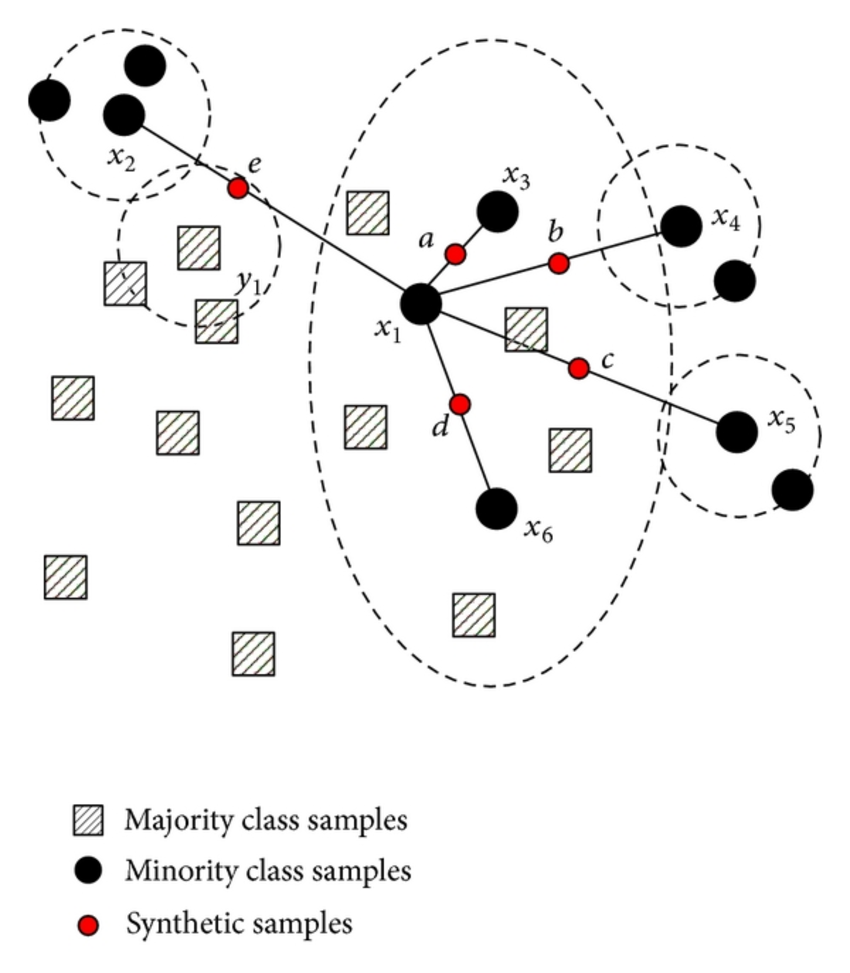

Although oversampling helps to improve our models by means of balancing our data, we cannot forget that we will be dealing with synthetic data. In order to control the distortion this implies, we will only apply the technique to the training subsets; if we balanced the test subsets, our validation model might work well, but it would probably not do so - or so much - with new data. However, for projection purposes later on (see notebbok *5. Data Modelling II_Global Surrogate & Evaluation*), we will also transform the test data.

References:

* https://medium.com/coinmonks/smote-and-adasyn-handling-imbalanced-data-set-34f5223e167 
* https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
* https://towardsdatascience.com/sampling-techniques-for-extremely-imbalanced-data-part-ii-over-sampling-d61b43bc4879

#### Train: Standardised subset

In [12]:
# Get features indices
Xsel_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 41 to 4
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    57 non-null     int64  
 1   underlying_conditions     57 non-null     int64  
 2   immunosupressed           57 non-null     int64  
 3   pid_sid                   57 non-null     int64  
 4   admission_picu            57 non-null     int64  
 5   respiratory               57 non-null     int64  
 6   gastrointestinal          57 non-null     int64  
 7   fever                     57 non-null     int64  
 8   cxr                       57 non-null     int64  
 9   pneumonia                 57 non-null     int64  
 10  oxigen                    57 non-null     int64  
 11  antibiotics               57 non-null     float64
 12  corticoids                57 non-null     int64  
 13  age_std                   57 non-null     float64
 14  neutrocytes_

In [13]:
# Apply SMOTE-NC to the train subset 
from imblearn.over_sampling import SMOTENC
from collections import Counter
sm = SMOTENC(random_state=42, 
             categorical_features=[0,1,2,3,4,5,6,7,8,9,10,11,12])
Xsel_trainres, ysel_trainres = sm.fit_resample(Xsel_train,ysel_train)
print('Original dataset (y_train) samples per class {}'.format(Counter(ysel_train)))
print('Resampled dataset (y_trainres) samples per class {}'.format(Counter(ysel_trainres)))
Xsel_trainres.tail(10)

Original dataset (y_train) samples per class Counter({0: 44, 1: 13})
Resampled dataset (y_trainres) samples per class Counter({0: 44, 1: 44})


,gender,underlying_conditions,immunosupressed,pid_sid,admission_picu,respiratory,gastrointestinal,fever,cxr,pneumonia,oxigen,antibiotics,corticoids,age_std,neutrocytes_mice_std,lymphocytes_mice_std,crp_mice_std,diagnosis_delay_mice_std
78,0,1,0,0,0,1,0,1,1,1,0,0.0,0,-0.362764,-0.285394,-0.553312,-0.185244,-0.241943
79,1,1,0,0,0,1,0,1,1,1,1,0.0,0,-0.538320,0.438411,-0.136827,-0.605518,0.458391
80,1,1,1,1,0,1,0,1,1,1,0,0.0,0,0.801411,-0.230421,0.124768,0.285601,-0.070219
81,1,1,1,1,0,1,0,1,1,1,0,0.0,0,0.702222,-0.499977,0.287089,0.682811,-0.189911
82,1,1,0,0,0,1,0,1,1,1,1,0.0,0,-0.938438,0.007275,-0.038167,-0.129324,-0.656813
83,1,1,1,1,0,1,0,1,1,1,0,0.0,0,0.814215,-0.195626,0.103815,0.234327,-0.054769
84,1,1,0,0,0,1,0,1,1,1,1,0.0,0,-0.744290,-0.101386,-0.216275,-0.045943,-0.088832
85,1,1,0,0,0,1,0,1,1,1,1,0.0,0,0.040232,-0.306285,-0.601053,-0.372237,-0.323715
86,1,1,1,1,0,1,0,1,1,1,0,0.0,0,1.233898,-0.746731,-0.761993,-0.634786,-0.414132
87,1,0,0,0,0,1,1,1,1,0,0,0.0,0,0.389795,-0.461543,-0.735263,-0.597366,3.151592


#### Train: Non-standardised subset

In [14]:
# Get features indices
Xselns_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 66 to 33
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 29 non-null     int64  
 1   underlying_conditions  29 non-null     int64  
 2   immunosupressed        29 non-null     int64  
 3   pid_sid                29 non-null     int64  
 4   admission_picu         29 non-null     int64  
 5   respiratory            29 non-null     int64  
 6   gastrointestinal       29 non-null     int64  
 7   fever                  29 non-null     int64  
 8   cxr                    29 non-null     int64  
 9   pneumonia              29 non-null     int64  
 10  oxigen                 29 non-null     int64  
 11  antibiotics            29 non-null     float64
 12  corticoids             29 non-null     int64  
 13  age                    29 non-null     float64
 14  neutrocytes_mice       29 non-null     float64
 15  lymphoc

In [15]:
# Apply SMOTE-NC to the train subset 
sm = SMOTENC(random_state=42, 
             categorical_features=[0,1,2,3,4,5,6,7,8,9,10,11,12])
Xselns_trainres, yselns_trainres = sm.fit_resample(Xselns_train,yselns_train)
print('Original dataset (y_train) samples per class {}'.format(Counter(yselns_train)))
print('Resampled dataset (y_trainres) samples per class {}'.format(Counter(yselns_trainres)))
Xselns_trainres.tail(10)

Original dataset (y_train) samples per class Counter({0: 44, 1: 13})
Resampled dataset (y_trainres) samples per class Counter({0: 44, 1: 44})


,gender,underlying_conditions,immunosupressed,pid_sid,admission_picu,respiratory,gastrointestinal,fever,cxr,pneumonia,oxigen,antibiotics,corticoids,age,neutrocytes_mice,lymphocytes_mice,crp_mice,diagnosis_delay_mice
78,1,1,0,0,0,1,0,1,1,1,1,0.0,0,9.473146,3463.427162,2911.082801,7.782677,1.842285
79,1,0,0,0,0,1,0,1,1,1,0,0.0,0,8.947295,8531.130986,1470.344213,2.595376,8.100492
80,1,1,0,0,0,1,0,1,1,1,0,0.0,0,6.127528,6726.648654,2530.319429,4.560663,1.814549
81,1,1,0,0,0,1,0,1,1,1,0,0.0,0,0.918743,6507.449418,2515.465310,4.811393,0.220023
82,1,0,0,0,0,1,0,1,0,0,0,0.0,0,7.409084,7437.901388,2448.263553,3.312185,2.181816
83,1,1,0,0,0,1,0,1,1,1,0,0.0,0,6.799900,6754.943854,2532.236864,4.528298,2.020378
84,1,0,0,0,0,0,0,1,1,0,0,0.0,0,9.308383,5940.098011,871.822410,4.551577,4.852220
85,1,0,0,0,0,0,0,1,1,0,0,0.0,0,1.359374,6390.452940,1850.304049,4.110756,2.476762
86,1,1,0,0,0,1,0,1,1,1,0,0.0,0,0.868866,8821.940719,2213.254424,0.631206,0.116484
87,0,1,0,0,0,1,0,1,1,1,1,0.0,0,12.466398,2402.105997,377.733076,0.194203,2.554662


#### Test: Standardised

In [16]:
# Get features indices
Xsel_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 66 to 33
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    29 non-null     int64  
 1   underlying_conditions     29 non-null     int64  
 2   immunosupressed           29 non-null     int64  
 3   pid_sid                   29 non-null     int64  
 4   admission_picu            29 non-null     int64  
 5   respiratory               29 non-null     int64  
 6   gastrointestinal          29 non-null     int64  
 7   fever                     29 non-null     int64  
 8   cxr                       29 non-null     int64  
 9   pneumonia                 29 non-null     int64  
 10  oxigen                    29 non-null     int64  
 11  antibiotics               29 non-null     float64
 12  corticoids                29 non-null     int64  
 13  age_std                   29 non-null     float64
 14  neutrocytes

In [17]:
# Apply SMOTE-NC to the test subset 
sm = SMOTENC(random_state=42, 
             categorical_features=[0,1,2,3,4,5,6,7,8,9,10,11,12])
Xsel_testres, ysel_testres = sm.fit_resample(Xsel_test,ysel_test)
print('Original dataset (y_test) samples per class {}'.format(Counter(ysel_test)))
print('Resampled dataset (y_testres) samples per class {}'.format(Counter(ysel_testres)))
Xsel_testres.tail(10)

Original dataset (y_test) samples per class Counter({0: 23, 1: 6})
Resampled dataset (y_testres) samples per class Counter({0: 23, 1: 23})


,gender,underlying_conditions,immunosupressed,pid_sid,admission_picu,respiratory,gastrointestinal,fever,cxr,pneumonia,oxigen,antibiotics,corticoids,age_std,neutrocytes_mice_std,lymphocytes_mice_std,crp_mice_std,diagnosis_delay_mice_std
36,0,1,0,0,1,1,0,1,1,1,1,1.0,0,1.220853,0.012430,-0.183848,0.784833,-0.014462
37,1,1,0,0,0,1,0,1,1,0,0,0.0,0,-0.504009,-0.785565,0.087132,-0.611261,-0.135511
38,1,1,0,0,0,1,0,1,1,0,0,0.0,0,-0.981211,0.851764,0.528388,0.212513,0.018465
39,0,1,0,0,0,1,0,1,1,0,0,0.0,0,1.563180,-0.787184,-0.431873,-0.544580,3.317776
40,0,1,0,0,1,1,0,1,1,1,1,1.0,0,-0.099276,0.416408,0.272336,0.129446,-0.195269
41,0,1,0,0,1,1,0,1,1,1,1,1.0,0,1.211144,0.009953,-0.178805,0.763657,-0.026179
42,0,1,0,0,1,1,0,1,1,1,1,1.0,0,1.408882,0.060395,-0.281501,1.194917,0.212433
43,0,1,0,0,1,1,0,1,1,1,1,1.0,0,-0.865731,-0.586996,1.270859,-0.640400,-0.034519
44,0,1,0,0,1,1,0,1,1,1,1,1.0,0,1.005471,-0.042513,-0.071989,0.315092,-0.274364
45,1,1,0,0,1,1,0,1,1,1,1,1.0,0,-0.092377,-0.815007,-0.650810,-0.415177,-0.165619


#### Test: Non-standardised subset

In [18]:
# Get features indices
Xselns_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 66 to 33
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 29 non-null     int64  
 1   underlying_conditions  29 non-null     int64  
 2   immunosupressed        29 non-null     int64  
 3   pid_sid                29 non-null     int64  
 4   admission_picu         29 non-null     int64  
 5   respiratory            29 non-null     int64  
 6   gastrointestinal       29 non-null     int64  
 7   fever                  29 non-null     int64  
 8   cxr                    29 non-null     int64  
 9   pneumonia              29 non-null     int64  
 10  oxigen                 29 non-null     int64  
 11  antibiotics            29 non-null     float64
 12  corticoids             29 non-null     int64  
 13  age                    29 non-null     float64
 14  neutrocytes_mice       29 non-null     float64
 15  lymphoc

In [19]:
# Apply SMOTE-NC to the test subset 
sm = SMOTENC(random_state=42, 
             categorical_features=[0,1,2,3,4,5,6,7,8,9,10,11,12])
Xselns_testres, yselns_testres = sm.fit_resample(Xselns_test,yselns_test)
print('Original dataset (y_test) samples per class {}'.format(Counter(yselns_test)))
print('Resampled dataset (y_testres) samples per class {}'.format(Counter(yselns_testres)))
Xselns_testres.tail(10)

Original dataset (y_test) samples per class Counter({0: 23, 1: 6})
Resampled dataset (y_testres) samples per class Counter({0: 23, 1: 23})


,gender,underlying_conditions,immunosupressed,pid_sid,admission_picu,respiratory,gastrointestinal,fever,cxr,pneumonia,oxigen,antibiotics,corticoids,age,neutrocytes_mice,lymphocytes_mice,crp_mice,diagnosis_delay_mice
36,0,1,0,0,1,1,0,1,1,1,1,1.0,0,11.852445,7161.345932,2014.709948,9.536750,2.852445
37,1,1,0,0,0,1,0,1,1,0,0,0.0,0,8.726250,2566.016207,3141.734198,0.730919,12.100015
38,1,1,0,0,0,1,0,1,1,0,0,0.0,0,0.141509,12464.668474,3983.747498,5.897274,3.007066
39,0,1,0,0,0,1,0,1,1,0,0,0.0,0,13.976938,2224.537095,1211.531213,1.351187,17.677126
40,0,1,0,0,1,1,0,1,1,1,1,1.0,0,4.972659,4875.216453,4452.468750,2.317423,1.948496
41,0,1,0,0,1,1,0,1,1,1,1,1.0,0,11.800417,7145.992159,2028.978151,9.400590,2.800417
42,0,1,0,0,1,1,0,1,1,1,1,1.0,0,12.860003,7458.685614,1738.393303,12.173616,3.860003
43,0,1,0,0,1,1,0,1,1,1,1,1.0,0,4.157467,1536.856379,650.461086,0.775470,1.973756
44,0,1,0,0,1,1,0,1,1,1,1,1.0,0,10.698314,6820.751510,2331.223060,6.516293,1.698314
45,1,1,0,0,1,1,0,1,1,1,1,1.0,0,4.815458,1952.699251,699.667078,1.745498,2.181213


### Feature selection II: PCA

Principal Component Analysis (PCA) is an unsupervised linear transformation technique that is widely used across different fields, most prominently for feature extraction and dimensionality reduction. PCA helps us to identify patterns in data based on the correlation between features. In a nutshell, PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.

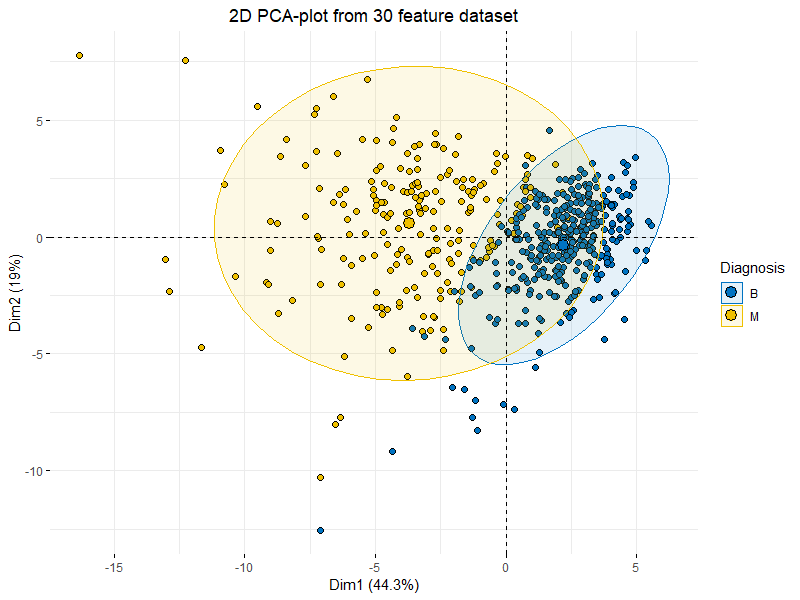

Reference:

* https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad

#### PCA Analyses

In [20]:
# PCA definition
from sklearn.decomposition import PCA
pca = PCA(n_components = "mle", svd_solver ="full") # mle = automatic choice of dimensionality according to Minka's 
                                                        # maximum likelihood estimates 

In [21]:
# Fit the PCA model to the X_train
Xsel_trainres_pcamodel = pca.fit(Xsel_trainres)

Text(0.5, 1.0, 'PCA Cummulative Explained Variance - Xext_trainres')

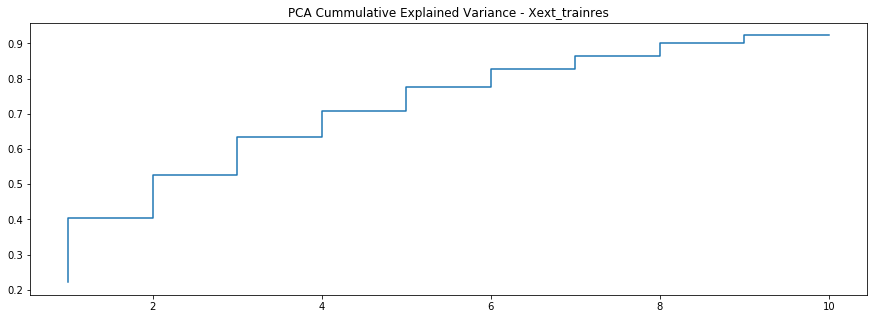

In [22]:
# Plot the cummulative explained variance
%matplotlib inline
Xsel_trainres_expvar = Xsel_trainres_pcamodel.explained_variance_ratio_.cumsum()
fig = plt.figure(figsize=(15,5))
fig.patch.set_facecolor('white')
plt.step(list(range(1,len(Xsel_trainres_expvar)+1)),Xsel_trainres_expvar)
plt.title("PCA Cummulative Explained Variance - Xext_trainres")

In [23]:
# Inspect the cummulative explained variance values
Xsel_trainres_expvar

array([0.22119604, 0.40302543, 0.52697543, 0.63322968, 0.70908493,
       0.77697626, 0.82788119, 0.86513253, 0.90093866, 0.92295633])

Looking at the cummulative variance graph and values, we should keep all the **10** components (i.e. the curve starts to flatten and the variance gain starts to decrease at the 9th-10th components). If we take a more stringent approach, we could say that the variance gain starts decreasing at the 8th component, so **7** components would be suggested.

Text(0.5, 0.98, 'PCA 10-Components - Xsel_trainres')

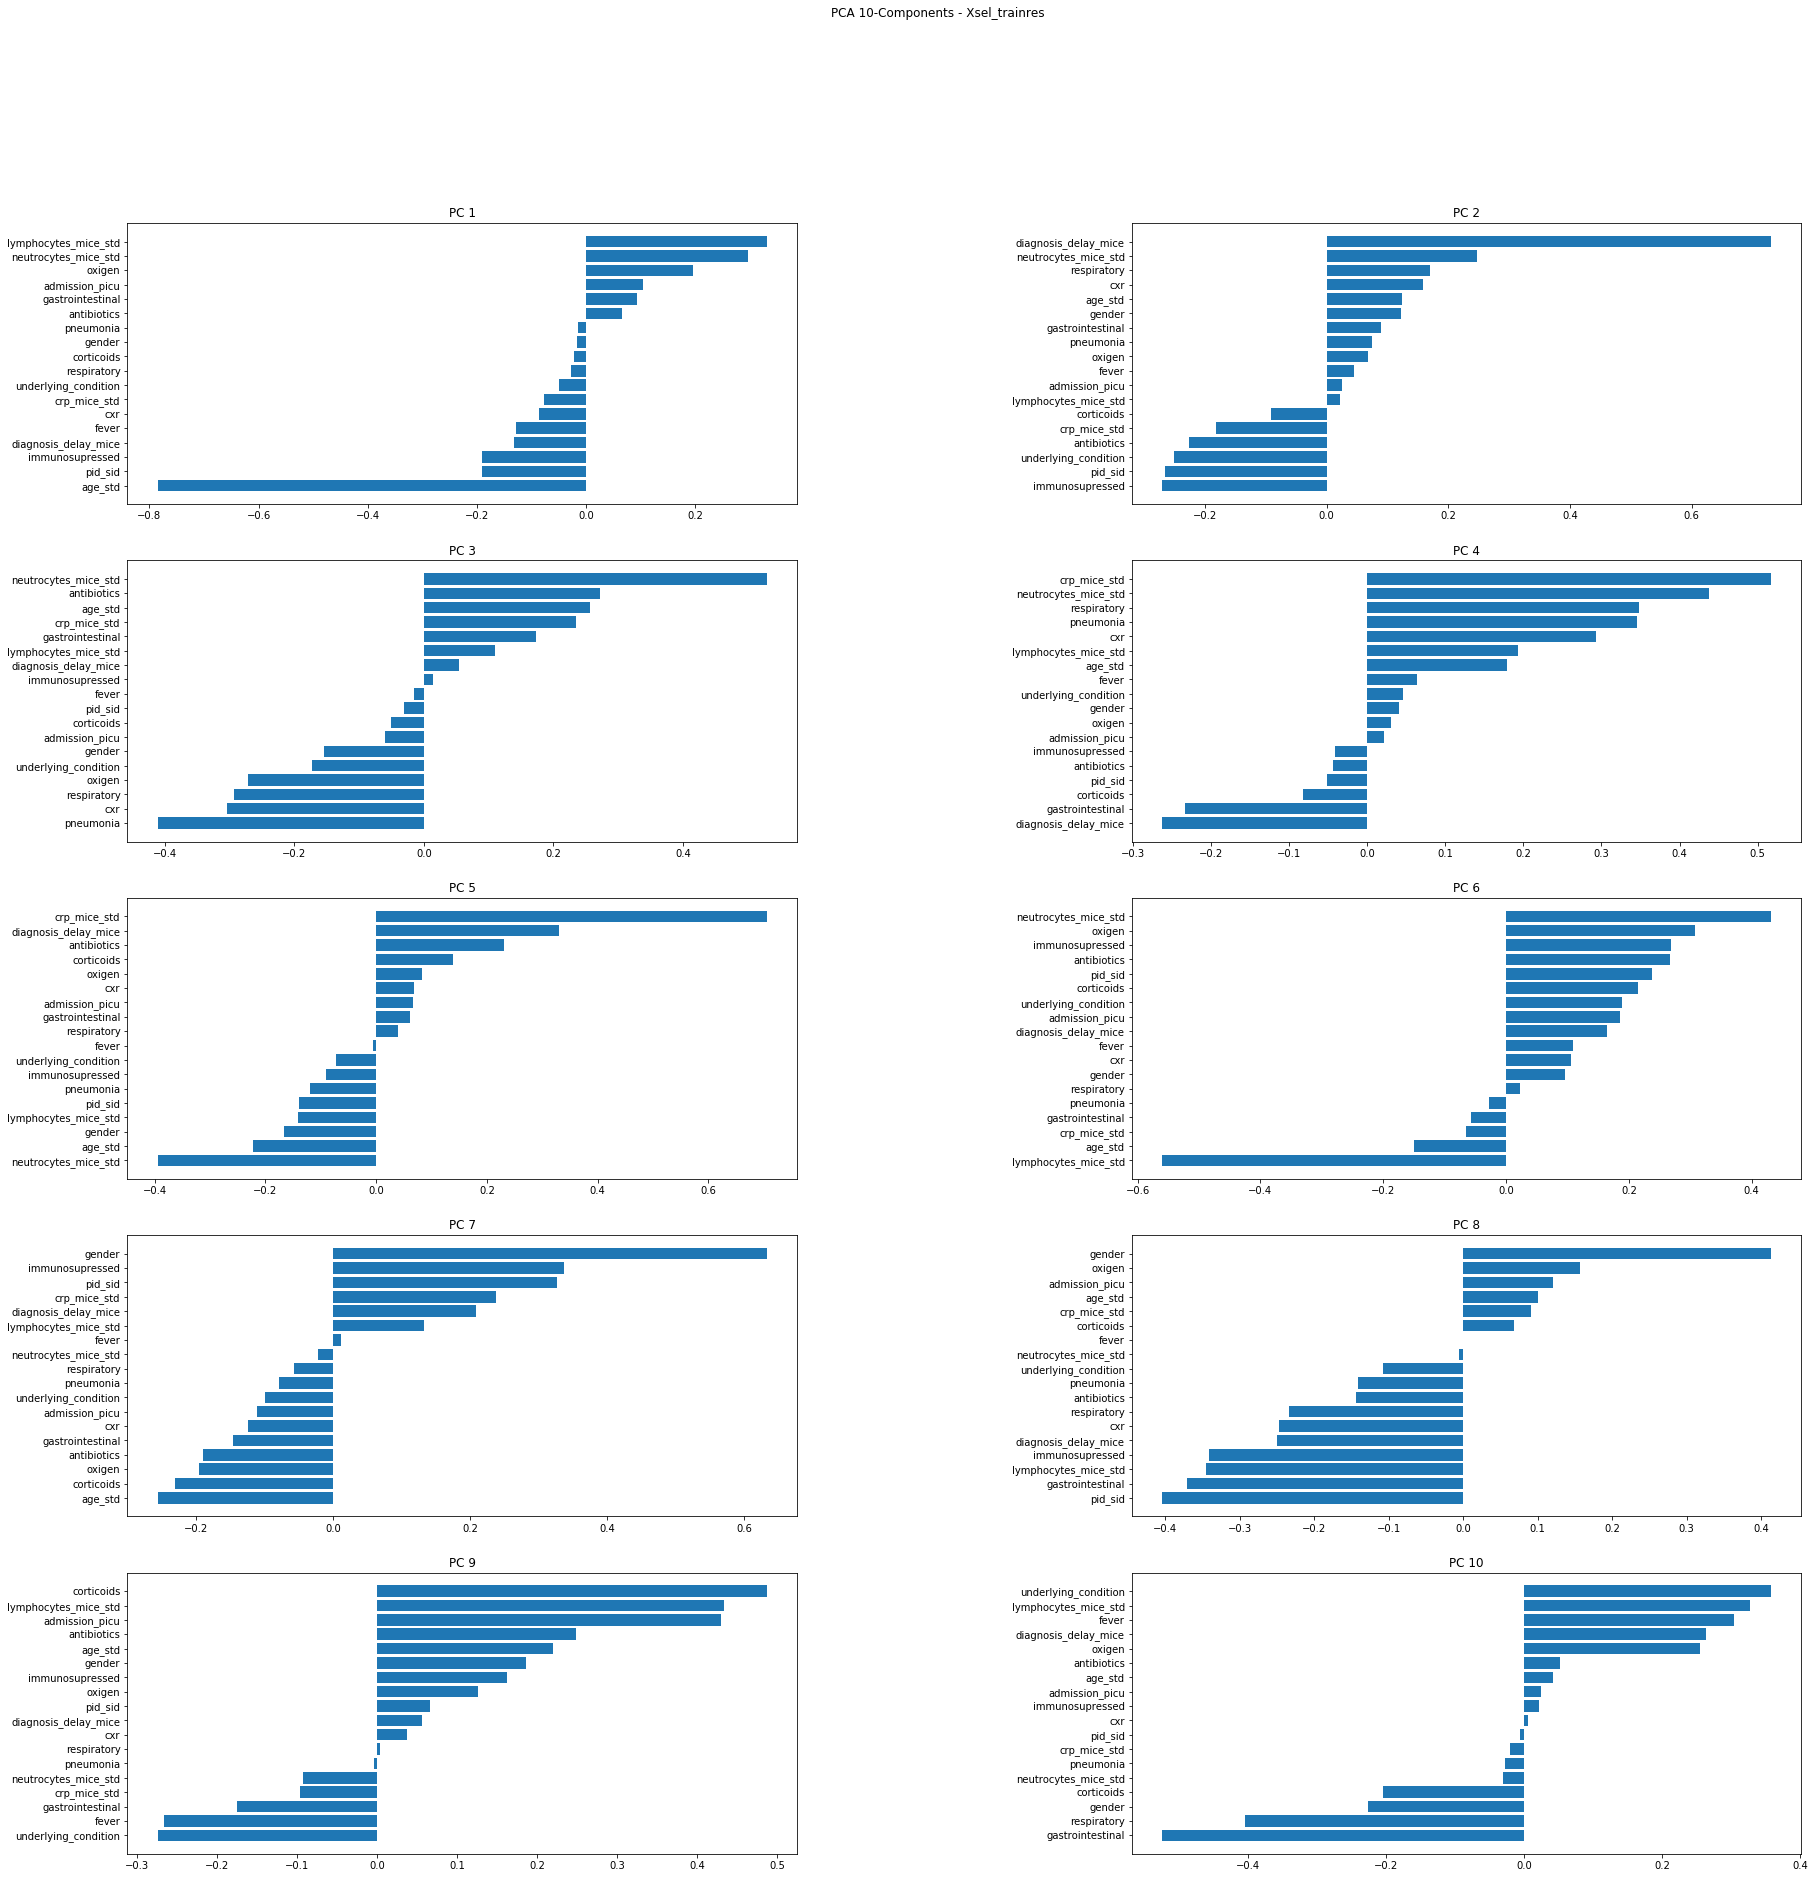

In [24]:
# Let's plot the components suggested - 10 components
Xsel_trainres_pcamodel = PCA(n_components=10, random_state=42).fit(Xsel_trainres)
fig, axs = plt.subplots(5, 2, figsize=(30,30))
fig.patch.set_facecolor((1,1,1))
plt.subplots_adjust(wspace=0.5) 
pc=-1
for i in list(range(5)): #plot lines
    for j in list(range(2)): #plot cols
        pc+=1
        component_feature_explanation = pd.Series(Xsel_trainres_pcamodel.components_[pc], 
                                                  index=list(Xsel_trainres)).sort_values()
        axis_truncated = [txt[:20] for txt in component_feature_explanation[-20:].index]
        axs[i, j].barh(axis_truncated, component_feature_explanation[-20:])
        axs[i, j].set_title('PC '+str(pc+1))
fig.suptitle("PCA 10-Components - Xsel_trainres")

IndexError: index 7 is out of bounds for axis 0 with size 7

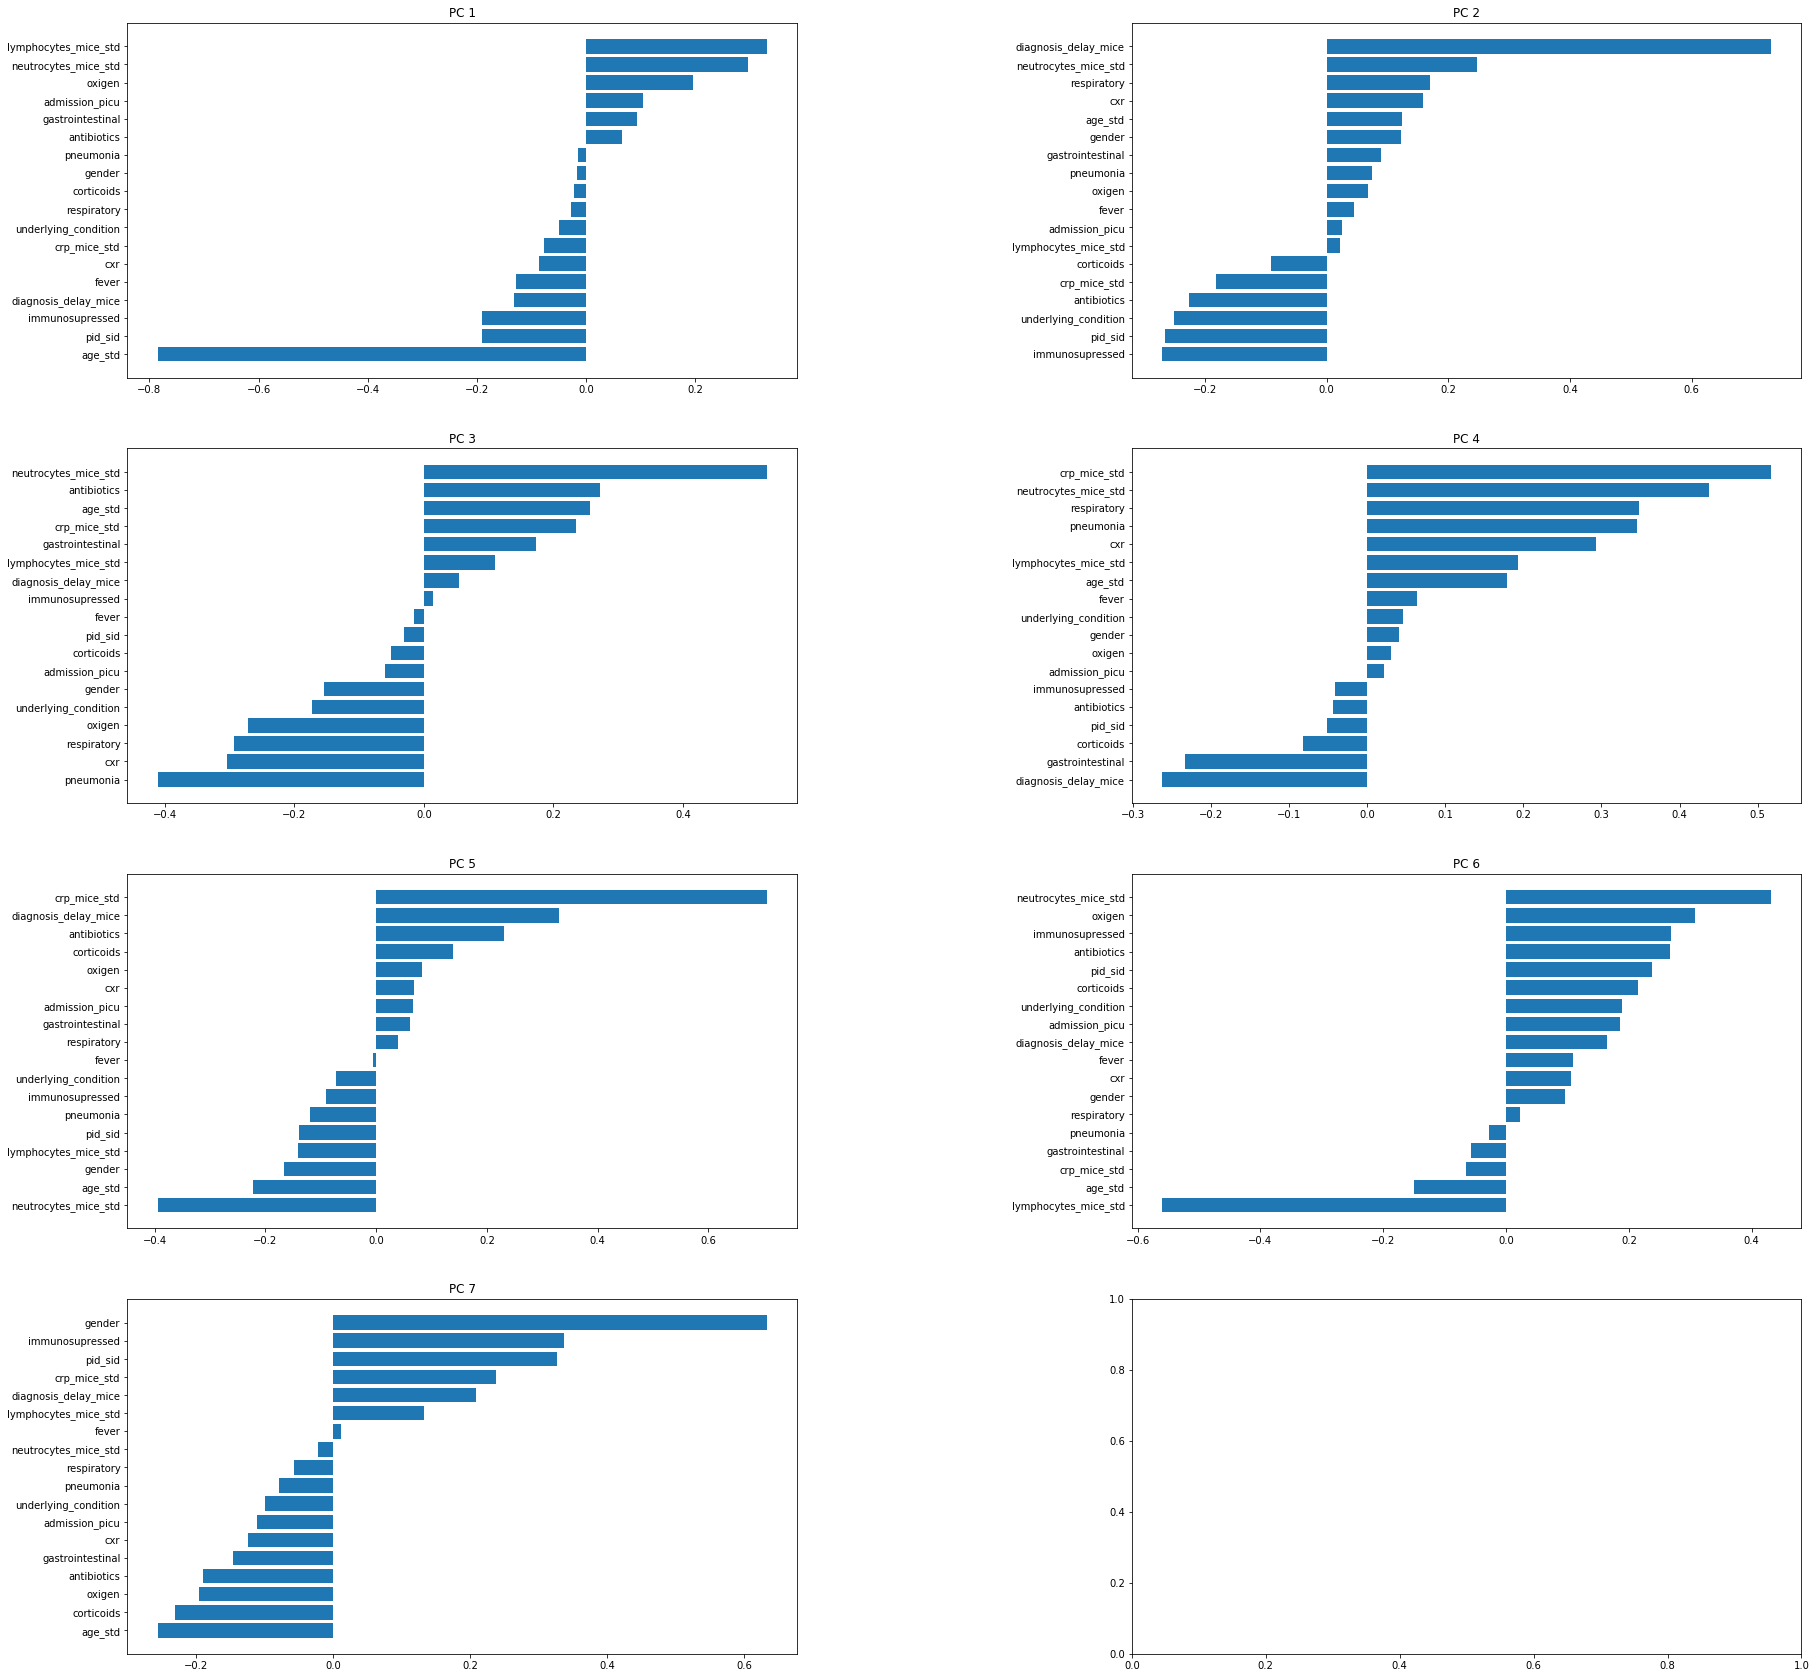

In [25]:
# Let's plot the components suggested - 7 components
Xsel_trainres_pcamodel = PCA(n_components=7, random_state=42).fit(Xsel_trainres)
fig, axs = plt.subplots(4, 2, figsize=(30,30))
fig.patch.set_facecolor((1,1,1))
plt.subplots_adjust(wspace=0.5) 
pc=-1
for i in list(range(4)): #plot lines
    for j in list(range(2)): #plot cols
        pc+=1
        component_feature_explanation = pd.Series(Xsel_trainres_pcamodel.components_[pc], 
                                                  index=list(Xsel_trainres)).sort_values()
        axis_truncated = [txt[:20] for txt in component_feature_explanation[-20:].index]
        axs[i, j].barh(axis_truncated, component_feature_explanation[-20:])
        axs[i, j].set_title('PC '+str(pc+1))
fig.suptitle("PCA 7-Components - Xsel_trainres")

Neither the 10 or 7 components models provide a clear pattern for the components suggested and, thus, applying any further dimensionality reduction to the dataset is not advisable.

### Save the pre-processed dataframes into new files

In [26]:
symp_sel.to_csv('symptoms_paediatric_pp2_symp_sel.csv', index=False)
symp_sel_ns.to_csv('symptoms_paediatric_pp2_symp_sel_ns.csv', index=False)
Xsel_train.to_csv('symptoms_paediatric_pp2_Xsel_train.csv', index=False)
ysel_train.to_csv('symptoms_paediatric_pp2_ysel_train.csv', index=False)
Xsel_test.to_csv('symptoms_paediatric_pp2_Xsel_test.csv', index=False)
ysel_test.to_csv('symptoms_paediatric_pp2_ysel_test.csv', index=False)
Xselns_train.to_csv('symptoms_paediatric_pp2_Xselns_train.csv', index=False)
yselns_train.to_csv('symptoms_paediatric_pp2_yselns_train.csv', index=False)
Xselns_test.to_csv('symptoms_paediatric_pp2_Xselns_test.csv', index=False)
yselns_test.to_csv('symptoms_paediatric_pp2_yselns_test.csv', index=False)
Xsel_trainres.to_csv('symptoms_paediatric_pp2_Xsel_trainres.csv', index=False)
ysel_trainres.to_csv('symptoms_paediatric_pp2_ysel_trainres.csv', index=False)
Xsel_testres.to_csv('symptoms_paediatric_pp2_Xsel_testres.csv', index=False)
ysel_testres.to_csv('symptoms_paediatric_pp2_ysel_testres.csv', index=False)
Xselns_trainres.to_csv('symptoms_paediatric_pp2_Xselns_trainres.csv', index=False)
yselns_trainres.to_csv('symptoms_paediatric_pp2_yselns_trainres.csv', index=False)
Xselns_testres.to_csv('symptoms_paediatric_pp2_Xselns_testres.csv', index=False)
yselns_testres.to_csv('symptoms_paediatric_pp2_yselns_testres.csv', index=False)